### Principal Component Analysis (PCA)

##### Steps for PCA
1. Standardize the d-dimensional dataset
2. Construct the covariance matrix
3. Decompose the covariance matrix into its eigenvectors and eigenvalues
4. Sort the eigenvalues by decreasing order in order to rank the eigenvectors
5. Select k eigenvectors, which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace (k<<d)
6. Construct a projection matrix W, from the top k eigenvectors
7. Transform the d-dimensional dataset, X, using the projection matrix W, to obtain the new k-dimensional feature subspace

### Extracting the principal components step by step

#### Importing dataset

In [2]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Separate data into training and test dataset using 70/30 formula and standardize them to unit variance

In [4]:
from sklearn.model_selection import train_test_split

X, y =  df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


#### Calculate covariance matrix and decompose into eigenvalues and eigenvectors

In [13]:
import numpy as np

covariance_matrix = np.cov(X_train_std.T)

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)


print('Eigenvalues: ', eigenvalues)

Eigenvalues:  [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


#### Sort the eigenvalues in decreasing order rank the eigenvectors

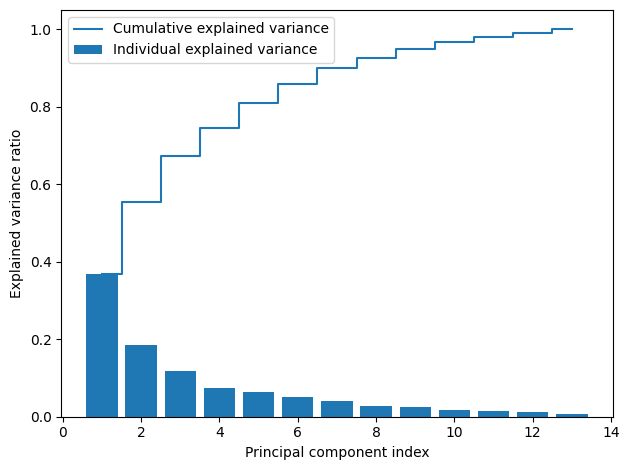

In [14]:
total = sum(eigenvalues)
variance_explained = [(i / total) for i in sorted(eigenvalues, reverse=True)]
cumulative_sum_var_exp = np.cumsum(variance_explained)

import matplotlib.pyplot as plt
plt.bar(range(1,14), variance_explained, align='center', label='Individual explained variance')
plt.step(range(1,14), cumulative_sum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Feature transformation
Now that we have successfully decomposed the covariance matrix into eigenpairs, let’s proceed with the last three steps to transform the Wine dataset onto the new principal component axes. The remaining steps we are going to tackle in this section are the following:

1. Select k eigenvectors, which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace.
2. Construct a projection matrix, W, from the “top” k eigenvectors.
3. Transform the d-dimensional input dataset, X, using the projection matrix, W, to obtain the new k-dimensional feature subspace.

In [16]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [17]:
# Choosing the first 2 eigenvalues so we cover the 60% of the variance in the dataset
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

print(w)

[[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


By executing the preceding code, we have created a 13×2-dimensional projection matrix, W, from the
top two eigenvectors.

Using the projection matrix, we can now transform an example, x (represented as a 13-dimensional
row vector), onto the PCA subspace (the principal components one and two) obtaining x′, now a
two-dimensional example vector consisting of two new features:

In [19]:
X_train_pca = X_train_std.dot(w)
print(X_train_pca)

[[ 2.38299011  0.45458499]
 [-1.96578183  1.65376939]
 [-2.53907598  1.02909066]
 [-1.43010776  0.6024011 ]
 [ 3.14147227  0.66214979]
 [ 0.50253552 -2.08907131]
 [ 0.04867722 -2.27536044]
 [ 2.47888989 -0.08603318]
 [ 2.01900259 -1.3538719 ]
 [ 0.75156583 -2.55367947]
 [ 0.72268915 -1.18404391]
 [-3.00366211  0.94626934]
 [ 2.57518878 -1.0697549 ]
 [ 3.73151104  1.01968876]
 [-1.12276518  0.13877   ]
 [ 2.85996853  2.28819559]
 [-0.74717125 -3.21746061]
 [-1.58427878  0.16048055]
 [ 3.38887101  2.11550689]
 [ 3.15405473  0.54233966]
 [-1.28036506 -1.72926871]
 [-1.71438911  0.71745249]
 [-1.55040291 -1.7580591 ]
 [ 1.10984489 -1.20480693]
 [-0.69108418 -1.71385374]
 [-2.086036   -1.68453671]
 [ 2.90393456  1.95258805]
 [-2.07635784  1.47183304]
 [-1.74756185 -1.25842546]
 [ 2.59424456 -0.1056037 ]
 [-2.50372355  0.70412212]
 [-2.19448402  2.18657552]
 [ 3.91634534  0.16136475]
 [-1.11739618  0.51921086]
 [-0.89996804 -2.04759575]
 [-1.71469178  0.61392169]
 [-2.48581303  0.76839561]
 